In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import pandas as pd

# Read the text file
                   
df = pd.read_csv('../AAB_DataCollection/DataCollection_1_26_2024/DataCollection1262024-3.txt')  # replace '\t' with your delimiter

# Save the DataFrame as a CSV file
df.to_csv('../AAB_DataCollection/DataCollection_1_26_2024/DataCollection1262024-3.csv', index=False)

df.head()  # prints the first 5 rows of the DataFrame

,Timestamp,Mode,Data
0,14:54:13.232,TX,b
1,14:54:23.226,RX,Pressure values:
2,14:54:23.226,RX,-0.23
3,14:54:23.344,RX,Pressure values:
4,14:54:23.344,RX,-0.03


In [4]:
# Now try selecting the 'Data' column
df = df.loc[df['Data'] != 'Pressure values:']
# Create a new column 'Sample' with values from 1 to the number of rows
df['Sample'] = range(1, len(df) + 1)

# Save the DataFrame as a CSV file
df.to_csv('../AAB_DataCollection/DataCollection_1_26_2024/DataCollection1262024-3.csv', index=False)

df.head()  # prints the first 5 rows of the DataFrame 

,Timestamp,Mode,Data,Sample
0,14:54:13.232,TX,b,1
2,14:54:23.226,RX,-0.23,2
4,14:54:23.344,RX,-0.03,3
6,14:54:23.463,RX,-0.23,4
8,14:54:23.582,RX,-0.03,5


In [5]:
df.tail()

,Timestamp,Mode,Data,Sample
2158,14:56:32.614,RX,2.56,1080
2160,14:56:32.705,RX,2.36,1081
2162,14:56:32.826,RX,2.46,1082
2163,14:56:32.942,TX,q,1083
2165,14:56:32.945,RX,2.46,1084


In [6]:
# Convert 'Timestamp' to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])



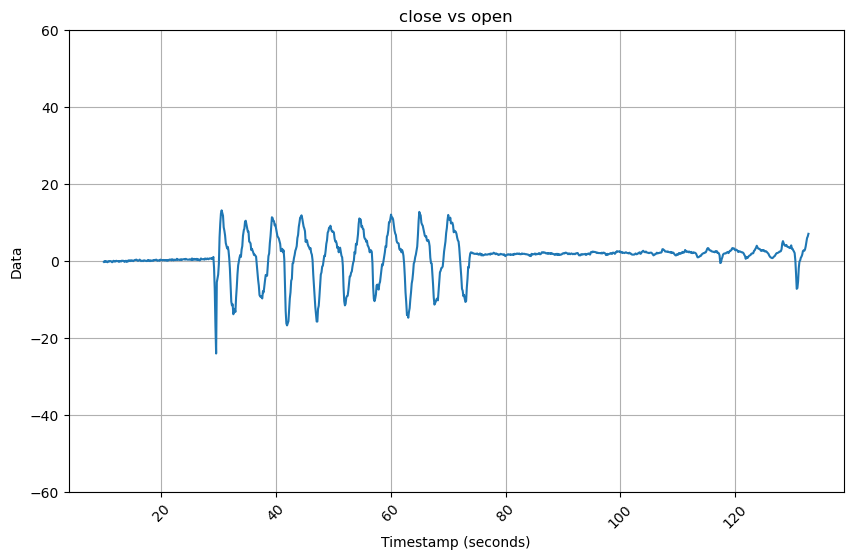

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Define start and end time
start_time = pd.to_datetime('14:54:13').time()
end_time = pd.to_datetime('14:56:26').time()

# Filter rows between start time and end time
filtered_df = df.copy()
filtered_df = filtered_df[(filtered_df['Timestamp'].dt.time >= start_time) & (filtered_df['Timestamp'].dt.time <= end_time)]

filtered_df = filtered_df.copy()
# Now you can modify 'Data' without warnings
filtered_df.loc[:, 'Data'] = pd.to_numeric(filtered_df['Data'], errors='coerce')

# Transform the time into seconds and make it start from 0
filtered_df['Timestamp'] = (filtered_df['Timestamp'] - filtered_df['Timestamp'].min()).dt.total_seconds()

# Create a new figure with a specific size (width, height)
plt.figure(figsize=(10, 6))

# Plot 'Data' against 'Timestamp'
plt.plot(filtered_df['Timestamp'], filtered_df['Data'])

# Set the title and labels
plt.title('close vs open')
plt.xlabel('Timestamp (seconds)')
plt.ylabel('Data')

# Adjust the spacing of the labels
plt.xticks(rotation=45)

# Set the y-axis limits to cover the entire range
plt.ylim(float('-60'), float('60'))

# Add a grid
plt.grid(True)

plt.savefig('1_26_2024-3.png')

# Show the plot
plt.show()
